# Deep learning for computer vision

Build and train convolutional networks for image recognition using CIFAR

In [1]:
import os
import sys
import pickle
import numpy as np
import torch
from torch import Tensor
from torch.utils.data.dataset import Dataset

from DataLoader import *

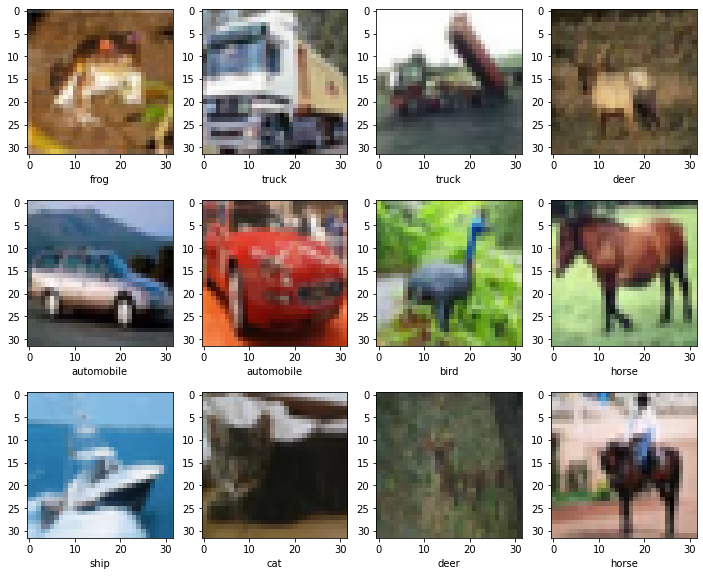

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader,Sampler

class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                        'dog', 'frog', 'horse', 'ship', 'truck'])

dataPath = "/Users/czkaiweb/Research/DeepVision/dataset/cifar-10-batches-py"

testPath = os.path.join(dataPath,"test_batch")
trainPath = [os.path.join(dataPath,"data_batch_%i"%i) for i in range(1,6)]

dataset = CIFAR(path = trainPath)
testset = CIFAR(path = testPath)

batch_size = 50
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=testset, shuffle=True, drop_last=True)

def display():
    plt.figure(figsize=[12,10])
    for step, data in enumerate(dataset,0):
        img,label = data
        # To display, color lay should be the last index
        img  = np.transpose(img, [1,2,0])
        plt.subplot(3,4,step+1)
        plt.xlabel(class_names[label])
        plt.imshow(img)
        if step == 11:
            break
            
display()

In [4]:
import torch
from torch import nn
from Model import CIFAR_NN

model = CIFAR_NN()

opt = torch.optim.SGD(model.parameters(), lr=1e-2)
crossentropy = nn.CrossEntropyLoss()



In [ ]:
loss_history = []
val_accuracy = []
def train(epoch):
    maxstep = 0
    epoch_loss = 0
    n_batches = len(dataset)//batch_size
    for step,data in enumerate(train_loader,0):
        train_x, train_y = data
        x = torch.tensor(train_x,dtype=torch.float32)
        y = torch.tensor(train_y,dtype=torch.float32)
        y_pred = model.forward(x)
        y_pred = y_pred.view(-1,10)
        # compute loss
        loss = crossentropy(y_pred,y.long()).mean()
        epoch_loss += loss.item()
        
        # compute gradients
        loss.backward()
        
        # adam step
        opt.step()
        
        # clear gradients
        opt.zero_grad()
        
    
    epoch_loss = epoch_loss / n_batches
    loss_history.append(epoch_loss)
    epoch_loss = 0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for i, data in enumerate(test_loader,0):
            img,label = data
            output = model.forward(img)
            _,predict = torch.max(output.data,1)
            filterList = (predict == label)
            correct += filterList.sum().data
            total   += len(filterList)
            if i == 500:
                break
    accu = float(correct)/total
    val_accuracy.append(accu)
    print("Epoch {}, loss {} Accurancy: {}".format(epoch, epoch_loss, accu))
                  
for epoch in range(1, 50):
    train(epoch)
    plt.plot(val_accuracy)

In [5]:
from Model import CIFAR_CNN
cnn_model = CIFAR_CNN()
cnn_model_norm = CIFAR_CNN(useBatchNorm = True)

opt_cnn = torch.optim.Adam(cnn_model.parameters())
crossentropy_cnn = nn.CrossEntropyLoss()

/opt/anaconda3/envs/Erdos/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
/opt/anaconda3/envs/Erdos/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


Epoch 1, loss 0 Accurancy: 0.5868263473053892
Epoch 2, loss 0 Accurancy: 0.6027944111776448
Epoch 3, loss 0 Accurancy: 0.6067864271457086
Epoch 4, loss 0 Accurancy: 0.656686626746507
Epoch 5, loss 0 Accurancy: 0.6387225548902196
Epoch 6, loss 0 Accurancy: 0.6147704590818364
Epoch 7, loss 0 Accurancy: 0.624750499001996
Epoch 8, loss 0 Accurancy: 0.6866267465069861
Epoch 9, loss 0 Accurancy: 0.590818363273453
Epoch 10, loss 0 Accurancy: 0.6107784431137725
Epoch 11, loss 0 Accurancy: 0.5728542914171657
Epoch 12, loss 0 Accurancy: 0.6506986027944112
Epoch 13, loss 0 Accurancy: 0.590818363273453
Epoch 14, loss 0 Accurancy: 0.592814371257485
Epoch 15, loss 0 Accurancy: 0.6067864271457086
Epoch 16, loss 0 Accurancy: 0.6007984031936128
Epoch 17, loss 0 Accurancy: 0.6147704590818364
Epoch 18, loss 0 Accurancy: 0.6107784431137725
Epoch 19, loss 0 Accurancy: 0.6207584830339321
Epoch 20, loss 0 Accurancy: 0.5588822355289421
Epoch 21, loss 0 Accurancy: 0.562874251497006
Epoch 22, loss 0 Accurancy: 

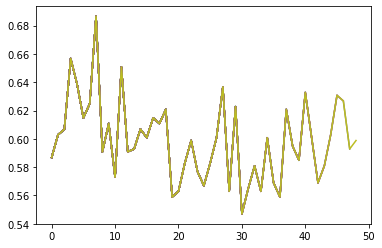

In [10]:
cnn_loss_history = []
cnn_val_accuracy = []
def cnn_train(epoch):
    maxstep = 0
    epoch_loss = 0
    n_batches = len(dataset)//batch_size
    for step,data in enumerate(train_loader,0):
        train_x, train_y = data
        x = torch.tensor(train_x,dtype=torch.float32)
        y = torch.tensor(train_y,dtype=torch.float32)
        if len(y) < batch_size:
            continue
        y_pred = cnn_model.forward(x)
        y_pred = y_pred.view(-1,10)
        # compute loss
        loss = crossentropy_cnn(y_pred,y.long()).mean()
        epoch_loss += loss.item()
        
        # compute gradients
        loss.backward()
        
        # adam step
        opt_cnn.step()
        
        # clear gradients
        opt_cnn.zero_grad()
        
    
    epoch_loss = epoch_loss / n_batches
    cnn_loss_history.append(epoch_loss)
    epoch_loss = 0
    
    correct = 0
    total = 0
    with torch.no_grad():     
        for i, data in enumerate(test_loader,0):
            img,label = data
            cnn_model.eval()
            output = cnn_model.forward(img)
            _,predict = torch.max(output.data,1)
            filterList = (predict == label)
            correct += filterList.sum().data
            total   += len(filterList)
            if i == 500:
                break
    accu = float(correct)/total
    cnn_val_accuracy.append(accu)
    print("Epoch {}, loss {} Accurancy: {}".format(epoch, epoch_loss, accu))
                  
for epoch in range(1, 50):
    cnn_train(epoch)
    plt.plot(cnn_val_accuracy)